In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from functools import reduce

标准正太分布：
          求解标准一维高斯分布，以及任意方差，均值下的一维高斯分布。

2386.064699092076


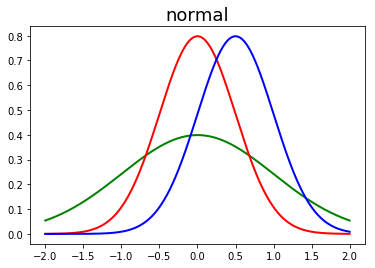

In [16]:
x = np.linspace(-2,2,10000)
def normal(x,u=0,sigma = 1):
    return np.exp(-(x-u)**2/(2*sigma**2))/(2*np.pi*sigma**2)**0.5
y1 = normal(x)
y2 = normal(x,0,0.5)
y3 = normal(x,0.5,0.5)
fig,ax=plt.subplots()
plt.title('normal',fontsize=18)
plt.plot(x,y1,'g-',label='normal',lw=2)
plt.plot(x,y2,'r-',label='normal',lw=2)
plt.plot(x,y3,'b-',label='normal',lw=2)
print(np.sum(y1,axis = 0))

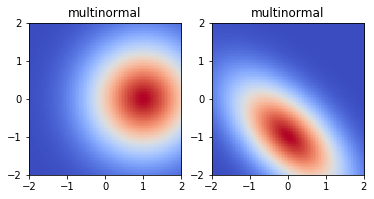

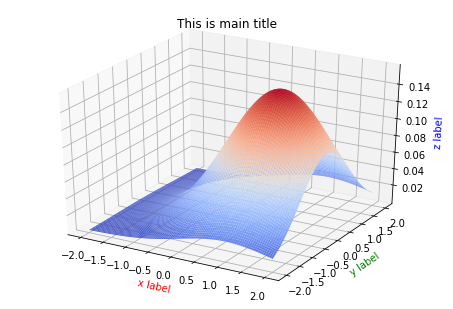

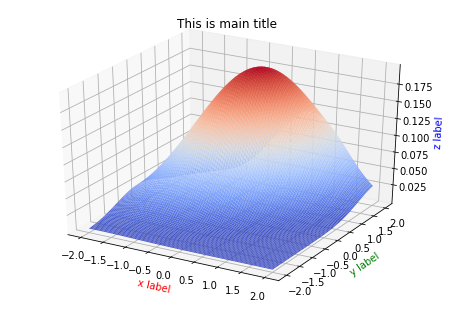

In [3]:
x1_LIMS = (-2,2)
x2_LIMS = (-2,2)

x1 = np.linspace(*x1_LIMS, 100)   #*list  *args
x2 = np.linspace(*x2_LIMS, 100)
xx1,xx2 = np.meshgrid(x1, x2)

u = [1,0]
sigma = [[1,0],[0,1]]

def multinormal(x1,x2,u,sigma):
    x1, x2 = np.meshgrid(x1, x2)
    shape = x1.shape
    dot_num = shape[0]*shape[1]
    x = np.zeros((dot_num,2))
    y = np.zeros((dot_num,))
    x[:,0] = x1.reshape(-1,1)[:,0]
    x[:,1] = x2.reshape(-1,1)[:,0]
    inv = np.linalg.inv(sigma)
    det = np.linalg.det(sigma)
    for i in range(dot_num):
        y[i] = np.exp(-np.dot(np.dot(x[i]-u,inv),(x[i]-u).T)/2)/(2*np.pi*det**0.5)
    return y.reshape(*shape)

y1 = multinormal(x1,x2,u,sigma)
y2 = multinormal(x1,x2,[0,1],[[1,0.6],[0.6,1]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(y1, extent=(*x1_LIMS, *x2_LIMS), cmap=plt.cm.coolwarm)
ax.set_title("multinormal")
ax = fig.add_subplot(122)
ax.imshow(y2, extent=(*x1_LIMS, *x2_LIMS), cmap=plt.cm.coolwarm)
ax.set_title("multinormal")

fig1=plt.figure()#创建一个绘图对象
ax=Axes3D(fig1)
plt.title("This is main title")#总标题
ax.plot_surface(xx1, xx2, y1, rstride=1, cstride=1, cmap=plt.cm.coolwarm)#用取样点(x,y,z)去构建曲面
ax.set_xlabel('x label', color='r')
ax.set_ylabel('y label', color='g')
ax.set_zlabel('z label', color='b')
plt.show()

fig2=plt.figure()#创建一个绘图对象
ax=Axes3D(fig2)
plt.title("This is main title")#总标题
ax.plot_surface(xx1, xx2, y2, rstride=1, cstride=1, cmap=plt.cm.coolwarm)#用取样点(x,y,z)去构建曲面
ax.set_xlabel('x label', color='r')
ax.set_ylabel('y label', color='g')
ax.set_zlabel('z label', color='b')
plt.show()

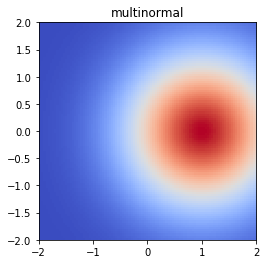

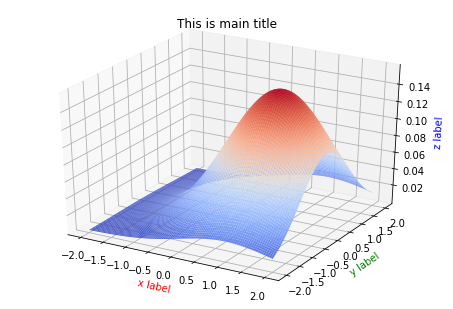

In [4]:
x1_LIMS = (-2,2)
x2_LIMS = (-2,2)

x1 = np.linspace(*x1_LIMS, 100)   #*list  *args
x2 = np.linspace(*x2_LIMS, 100)
xx1,xx2 = np.meshgrid(x1, x2)

u = [1,0]
sigma = [1,1]

def multinormal_iid(x1,x2,u,sigma):
    x1, x2 = np.meshgrid(x1, x2)
    shape = x1.shape
    dot_num = shape[0]*shape[1]
    x = np.zeros((dot_num,2))
    x[:,0] = x1.reshape(-1,1)[:,0]
    x[:,1] = x2.reshape(-1,1)[:,0]
    det = reduce(lambda x,y:x*y,sigma)
    y = -(x-u)**2/sigma/2
    y = np.sum(y,axis=1)
    y = np.exp(y)/(2*np.pi*det**0.5)
    return y.reshape(*shape)

y1 = multinormal_iid(x1,x2,u,sigma)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(y1, extent=(*x1_LIMS, *x2_LIMS), cmap=plt.cm.coolwarm)
ax.set_title("multinormal")

fig1=plt.figure()#创建一个绘图对象
ax=Axes3D(fig1)
plt.title("This is main title")#总标题
ax.plot_surface(xx1, xx2, y1, rstride=1, cstride=1, cmap=plt.cm.coolwarm)#用取样点(x,y,z)去构建曲面
ax.set_xlabel('x label', color='r')
ax.set_ylabel('y label', color='g')
ax.set_zlabel('z label', color='b')
plt.show()

采样

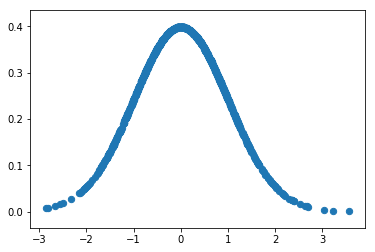

In [5]:
def normal(x,u=0,sigma = 1):
    return np.exp(-(x-u)**2/(2*sigma**2))/(2*np.pi*sigma**2)**0.5
x = np.random.randn(1000)
y = normal(x)
plt.scatter(x,y, marker = 'o', s=40, cmap=plt.cm.Spectral)#c=y_train


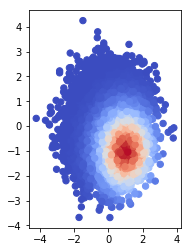

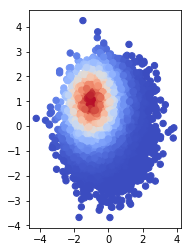

In [9]:
x = np.random.randn(10000,2)
mu = [1,-1]
var = np.array([1,1])
y =  x*var**0.5 + mu
def mulrandn(x):
    y = -(x)**2/2
    y = np.sum(y,axis=1)
    y = np.exp(y)/(2*np.pi)
    return y
def real(x,mu,var):
    det = reduce(lambda m,n:m*n,var)
    y = -(x-mu)**2/var/2
    y = np.sum(y,axis=1)
    y = np.exp(y)/(2*np.pi*det**0.5)
    return y
lx = real(x,mu,var)
ly = mulrandn(y)
fig = plt.figure()
ax = fig.add_subplot(121)
plt.scatter(x[:,0],x[:,1],c=lx, marker = 'o', s=40, cmap=plt.cm.coolwarm)#c=y_train
fig = plt.figure()
ax = fig.add_subplot(122)
plt.scatter(x[:,0],x[:,1],c=ly, marker = 'o', s=40, cmap=plt.cm.coolwarm)#c=y_train

In [12]:
print(np.mean(y,axis = 0))
print(np.var(y,axis = 0))

[ 0.99411476 -0.9851763 ]
[1.00609401 1.00309762]


In [15]:
print(np.sum(lx,axis = 0))
#print(np.var(lx,axis = 0))

478.10381306930685
